In [ ]:
print("hello")
# apt update -y && apt install python3
# venv 만들기(vscode gui에서 클릭클릭하다보면 됨)
# venv 만드는 이유? 파이썬이 운영체제도 사용하는 공용 파이썬이라 거기에 어떤 모듈들을 설치하면 운영체제가 박살날 수도 있어서
# 새로운 파이썬을 복제해서 쓰는 것
# 컨트롤 클릭 하면 내부로 들어가볼 수 있어요
# 반대로 컨트롤 클릭이 안먹히면 잘 안깔린거
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

hello


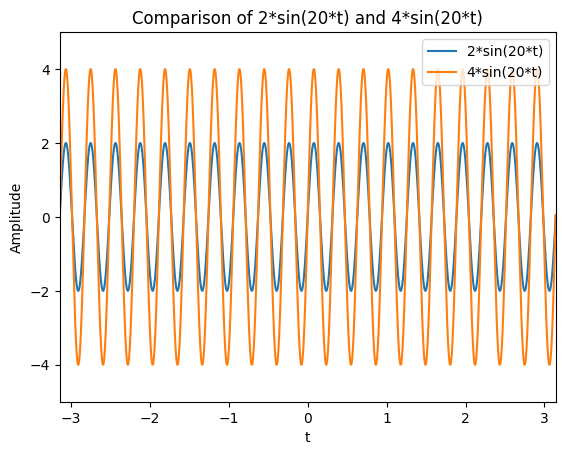

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
y1 = np.loadtxt('data_2sin20t.txt')
y2 = np.loadtxt('data_4sin20t.txt')

# Generate time axis based on number of samples and known range
t = np.linspace(-10 * np.pi, 10 * np.pi, y1.size)

# Plot for comparison
plt.figure()
plt.plot(t, y1, label='2*sin(20*t)')
plt.plot(t, y2, label='4*sin(20*t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Comparison of 2*sin(20*t) and 4*sin(20*t)')

zoom_range = np.pi  # +-π around center
plt.xlim(-zoom_range, zoom_range)
plt.ylim(-5, 5)

plt.show()
# 좋은데?

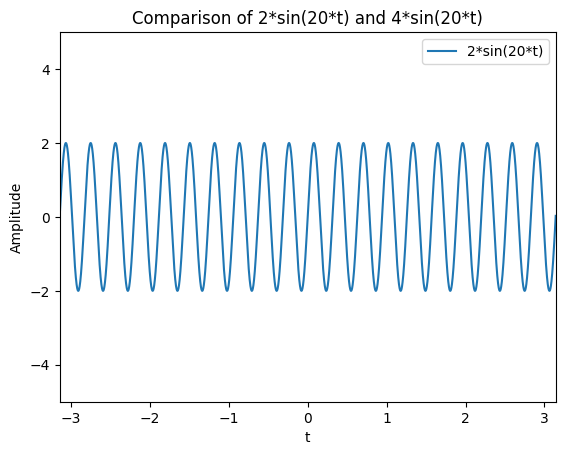

In [9]:
import math

SIZE = 65536
START = -10 * math.pi
END   =  10 * math.pi
STEP  = (END - START) / (SIZE - 1)

with open("data_2sin20t.txt", "w") as f:
    for i in range(SIZE):
        t = START + i * STEP
        y = 2 * math.sin(20 * t)
        f.write(f"{y}\n")


import numpy as np
import matplotlib.pyplot as plt

# Load datasets
y1 = np.loadtxt('data_2sin20t.txt')

# Generate time axis based on number of samples and known range
t = np.linspace(-10 * np.pi, 10 * np.pi, y1.size)

# Plot for comparison
plt.figure()
plt.plot(t, y1, label='2*sin(20*t)')

plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Comparison of 2*sin(20*t) and 4*sin(20*t)')

zoom_range = np.pi  # +-π around center
plt.xlim(-zoom_range, zoom_range)
plt.ylim(-5, 5)

plt.show()
# 좋은데?

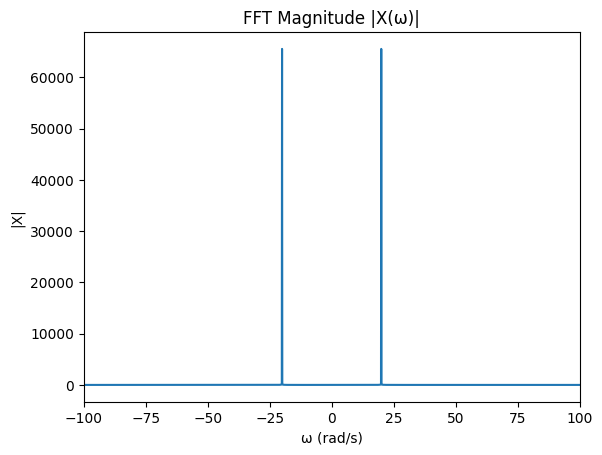

Max reconstruction error: 7.189345407887515e-08


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# FFT comparison and validation
# ============================

# Load FFT outputs generated by C pipeline
spec_re = np.loadtxt('fft_2sin20t_real.txt')
spec_im = np.loadtxt('fft_2sin20t_imag.txt')
spec = spec_re + 1j * spec_im

# Construct angular‑frequency axis ω (rad/s)
N = spec.size
dt = (20 * np.pi) / (N - 1)          # sampling interval from time axis
omega = np.fft.fftfreq(N, d=dt) * 2 * np.pi

# Sort for ascending ω, then plot magnitude
idx = np.argsort(omega)
omega_sorted = omega[idx]
mag_sorted   = np.abs(spec[idx])

plt.figure()
plt.plot(omega_sorted, mag_sorted)
plt.title('FFT Magnitude |X(ω)|')
plt.xlabel('ω (rad/s)')
plt.ylabel('|X|')
# Zoom tighter around main spectral lobe (≈ ±20 rad/s)
plt.xlim(-100, 100)            # zoom into low‑freq region for visibility
# plt.xlim(18, 22)            # zoom into low‑freq region for visibility
# plt.xlim(18, 22)            # zoom into low‑freq region for visibility
plt.show()

# Sanity check: IFFT back to time domain and compare with original y1
recon = np.fft.ifft(spec).real
max_err = np.max(np.abs(recon - y1))
print('Max reconstruction error:', max_err)




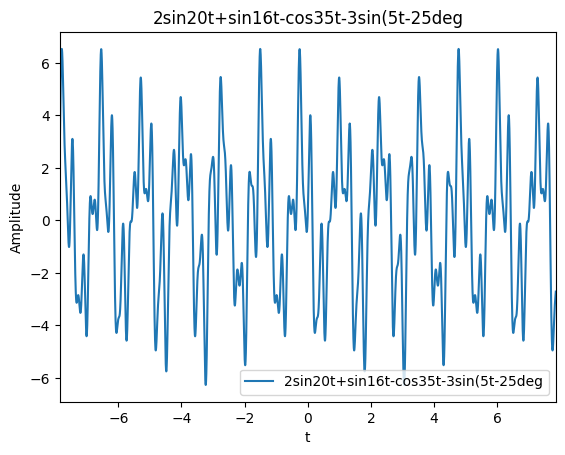

In [ ]:
import math

SIZE = 65536
START = -10 * math.pi
END   =  10 * math.pi
STEP  = (END - START) / (SIZE - 1)

with open("data_2sin20t+sin16t-cos35t-3sin(5t-25deg).txt", "w") as f:
    for i in range(SIZE):
        t = START + i * STEP
        y1 = 2 * math.sin(20 * t)
        y2 = 1*math.sin(16 * t)
        y3 = -1*math.cos(35 * t)
        y4 = -3*math.sin(5 * t - 25*math.pi/180)
        y= y1+y2+y3+y4
        f.write(f"{y}\n")


import numpy as np
import matplotlib.pyplot as plt

# Load datasets
y1 = np.loadtxt('data_2sin20t+sin16t-cos35t-3sin(5t-25deg).txt')

# Generate time axis based on number of samples and known range
t = np.linspace(-10 * np.pi, 10 * np.pi, y1.size)

# Plot for comparison
plt.figure()
plt.plot(t, y1, label='2sin20t+sin16t-cos35t-3sin(5t-25deg')

plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('2sin20t+sin16t-cos35t-3sin(5t-25deg')

zoom_range = 2.5*np.pi  # +-π around center
plt.xlim(-zoom_range, zoom_range)
# plt.ylim(-5, 5)

plt.show()
# 어우 못생겼다

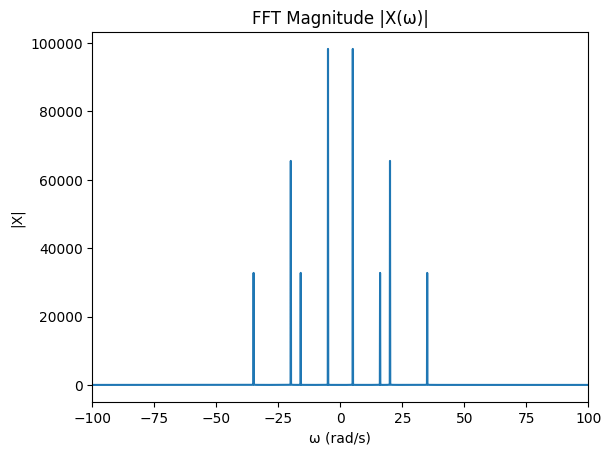

Max reconstruction error: 4.9223606933183115


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# FFT comparison and validation
# ============================

# Load FFT outputs generated by C pipeline
spec_re = np.loadtxt('fft_stupid_real.txt')
spec_im = np.loadtxt('fft_stupid_imag.txt')
spec = spec_re + 1j * spec_im

# Construct angular‑frequency axis ω (rad/s)
N = spec.size
dt = (20 * np.pi) / (N - 1)          # sampling interval from time axis
omega = np.fft.fftfreq(N, d=dt) * 2 * np.pi

# Sort for ascending ω, then plot magnitude
idx = np.argsort(omega)
omega_sorted = omega[idx]
mag_sorted   = np.abs(spec[idx])

plt.figure()
plt.plot(omega_sorted, mag_sorted)
plt.title('FFT Magnitude |X(ω)|')
plt.xlabel('ω (rad/s)')
plt.ylabel('|X|')
# Zoom tighter around main spectral lobe (≈ ±20 rad/s)
plt.xlim(-100, 100)            # zoom into low‑freq region for visibility
# plt.xlim(18, 22)            # zoom into low‑freq region for visibility
# plt.xlim(18, 22)            # zoom into low‑freq region for visibility
plt.show()

# Sanity check: IFFT back to time domain and compare with original y1
recon = np.fft.ifft(spec).real
max_err = np.max(np.abs(recon - y1))
print('Max reconstruction error:', max_err)


# 이건 또 예쁘죠? https://www.youtube.com/watch?v=Mc9PHZ3H36M